## Injury Prediction <span style="color:#275317">

    
    
<hr style="border: 1px solid #275317;">

<font color='#009644'>   
    
    


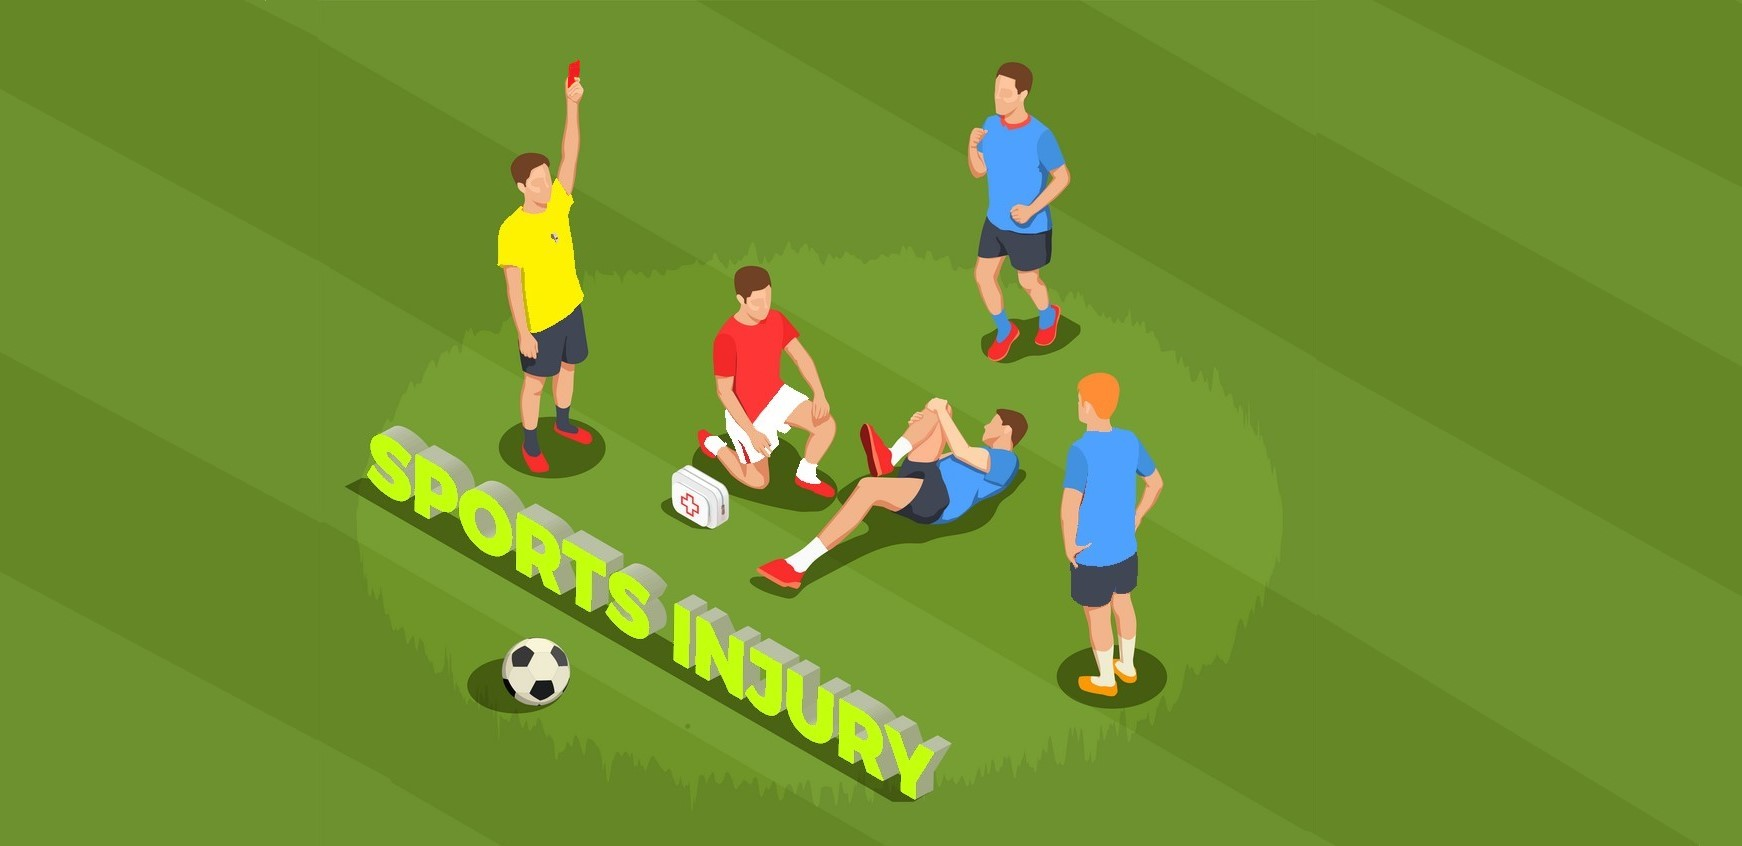

## Table of Contents <span style="color:#275317">| </span> <span style="color:#009644">  </span>

1. [Context <span style="color:#275317">| </span> <span style="color:#009644"> </span>](#context) <br>
2. [Objective <span style="color:#275317">| </span> <span style="color:#009644"> </span>](#2) <br>
3. [Importing Libraries and Data<span style="color:#275317"> | </span> <span style="color:#009644">   </span>](#3) <br>
4. [Checking Data<span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#4) <br>
5. [Creating New Columns <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#5) <br>
    5.1 [BMI Column <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#5.1) <br>
    5.2 [Age Group <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#5.2) <br>
6. [Exploratory Data Analysis<span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#6) <br>
    6.1 [Age_Group](#6.1) <br>
    6.2 [BMI_Classification](#6.2) <br>
    6.3 [Player_Weight](#6.3) <br>
    6.4 [Player_Height](#6.4) <br>
    6.5 [Training_Intensity](#6.5) <br>
    6.6 [Recovery_Time](#6.6) <br>
    6.7 [Previous_Injuries](#6.7) <br>
    6.8 [Recovery_Time](#6.8) <br>
7. [Data Preprocessing <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#7) <br>    
8. [Correlation Between Columns <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#8) <br>
    8.1 [Correlation with 'Likelihood_of_Injury <span style="color:#275317"> | </span> <span style="color:#009644"> </span>](#8.1) <br>
9. [Training Models <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#9) <br>
10. [Model Selection <span style="color:#275317"> | </span> <span style="color:#009644">  </span> ](#10) <br>
   10.1 [Confusion Matrix <span style="color:#275317"> | </span> <span style="color:#009644">  </span>](#101) <br> 
   10.2 [Inverted ROC Curve <span style="color:#275317"> | </span> <span style="color:#009644"> </span>](#102) <br> 
11. [The End <span style="color:blue">/ </span> <span style="color:#009644">  </span>](#the_end) <br>


## 1. Context <span style="color:#275317"> | </span> <span style="color:#009644"> </span> <a id="context"></a> 

- To address the growing concern about player safety and injury prevention in competitive sports, this synthetic data was generated, capturing critical attributes such as player demographics, training intensities, recovery times, and previous injury histories. Correlations have been established between these features and the likelihood of future injuries to accurately simulate real-world scenarios.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 


    

## 2. Objective <span style="color:#275317"> | </span> <span style="color:#009644"> </span> <a id="2"></a> 

- The main goal of this Notebook is to develop a classification model that contributes to preserving the athlete's health and physical condition by predicting the possibility of injuries based on various factors such as height, weight, history of previous injuries, recovery time, and training intensity, among others.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 

- 

## 3. Importing Libraries and Data<span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="3"></a> 

In [ ]:
pip install 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import NuSVC
from sklearn.tree import ExtraTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


# Libraries and Python version | Versão das bibliotecas e do Python
library = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
    }

# Libraries version
print("Library Version:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Library':^20} | {'Version':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, library in sorted(library.items()):
    print(f"{nome:<20} | {library.__version__:>10}")

# Python Version    
print()
print(f"Python Version: {python_version()}")

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Importing df 
df = pd.read_csv('/kaggle/input/injury-prediction-dataset/injury_data.csv')


df['Player_Weight'] = df['Player_Weight'].round(2)
df['Player_Height'] = df['Player_Height'].round(2)
df['Training_Intensity'] = df['Training_Intensity'].round(2)

# View df_vg 
df.head(5)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.25,175.73,1,0.46,5,0
1,37,71.00,174.58,0,0.23,6,1
2,32,80.09,186.33,0,0.61,2,1
3,28,87.47,175.50,1,0.25,4,1
4,25,84.66,190.18,0,0.58,1,1


## 4. Checking Data<span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="4"></a> 

- All data is already processed and we can move on to the next step.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 
- 

In [ ]:
# Creating DataFrame with Dtype, Unique, and Null information 
df_info = pd.DataFrame(df.dtypes, columns=['Dtype'])
df_info['Unique'] = df.nunique().values
df_info['Null'] = df.isnull().sum().values
df_info

,Dtype,Unique,Null
Player_Age,int64,22,0
Player_Weight,float64,863,0
Player_Height,float64,875,0
Previous_Injuries,int64,2,0
Training_Intensity,float64,101,0
Recovery_Time,int64,6,0
Likelihood_of_Injury,int64,2,0


In [4]:
# Df Describe 
with pd.option_context(
    "display.float_format",
    "{:.2f}".format,
    "display.max_columns",
    None,
):
    display(df.describe())

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,28.23,74.79,179.75,0.52,0.49,3.47,0.50
std,6.54,9.89,9.89,0.50,0.29,1.70,0.50
min,18.00,40.19,145.29,0.00,0.00,1.00,0.00
25%,22.00,67.95,173.03,0.00,0.24,2.00,0.00
50%,28.00,75.02,180.03,1.00,0.48,4.00,0.50
75%,34.00,81.30,186.56,1.00,0.73,5.00,1.00
max,39.00,104.65,207.31,1.00,1.00,6.00,1.00


## 5. Creating New Columns <span style="color:#275317">

- Two new columns will be created: one containing the BMI and the other Age Categories.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


### 5.1 BMI Column <span style="color:#275317"> 
- The Body Mass Index (BMI) is a measure used to assess whether a person has a healthy weight in relation to their height. It is calculated by dividing weight (in kilograms) by height squared (in meters).


- In a real-life scenario, BMI wouldn't be the best indicator to assess whether the athlete is in their best physical condition, as this index doesn't take into account the athlete's body composition. Someone with a more robust physical structure, with greater muscle mass and bone density, may be assessed as overweight, even though they are healthy and have a lower risk of injury. Ideally, we would have data on the body composition of each athlete, as well as the sport they practice. Since we do not have this data, BMI will be used as it is a generalist index.


- The mathematical formula for calculating BMI and its classifications are shown in the image below:

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


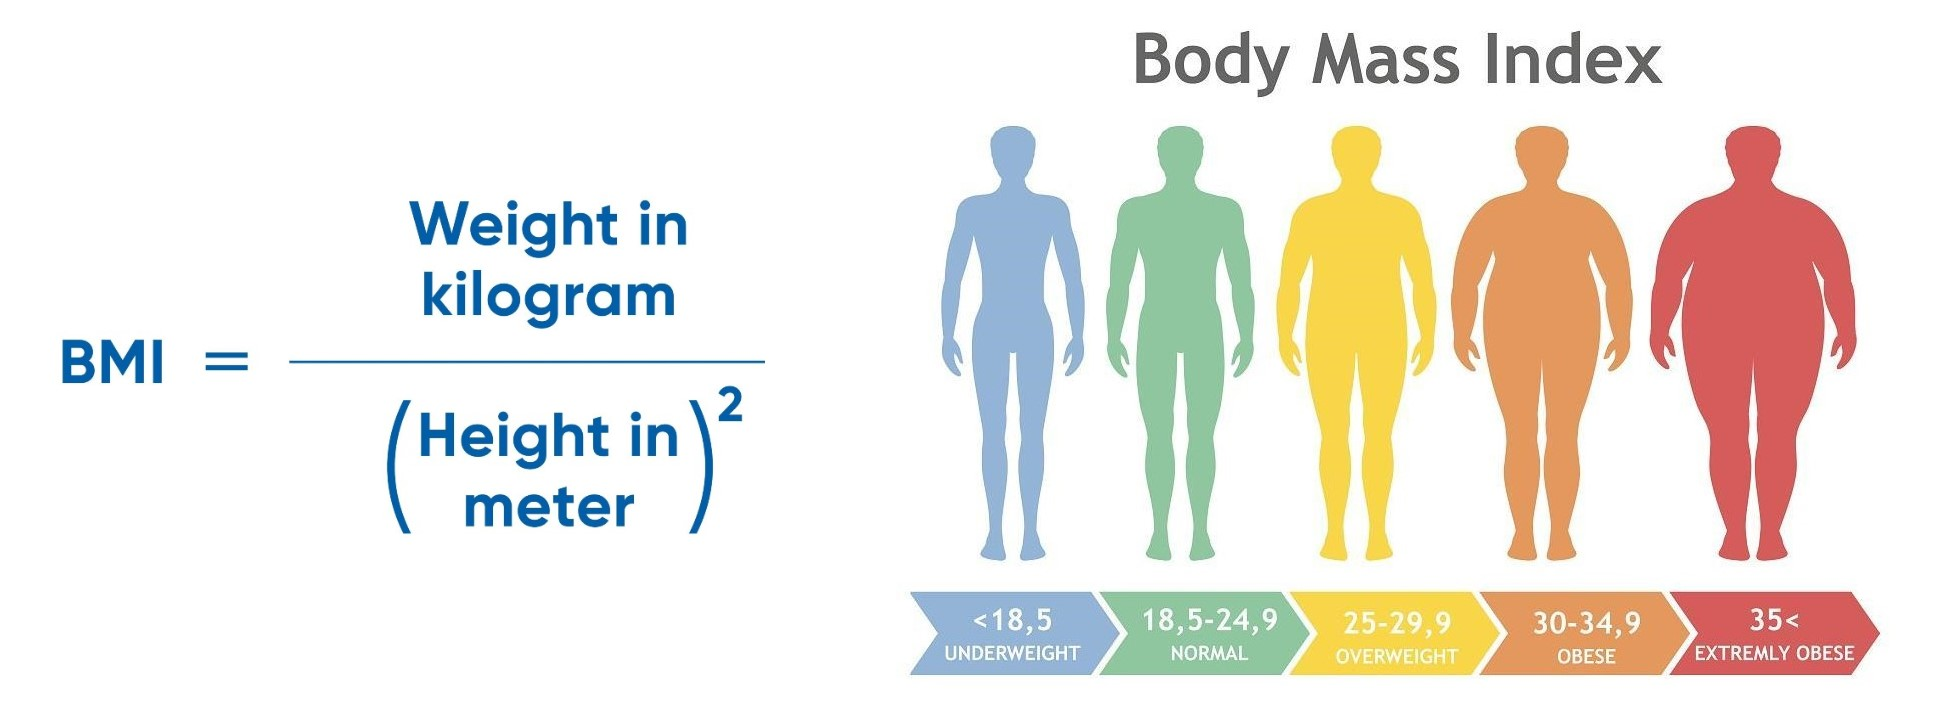

In [ ]:
# Calculate the Body Mass Index (BMI) 
df['BMI'] = df['Player_Weight'] / (df['Player_Height'] / 100) ** 2

# Defining gaps for BMI classification 
gaps = [-float('inf'), 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
categories = ['Underweight', 'Normal', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III']

# Create "BMI_Classification" column 
df['BMI_Classification'] = pd.cut(df['BMI'], bins=gaps, labels=categories, right=False)

df.head(1)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,BMI_Classification
0,24,66.25,175.73,1,0.46,5,0,21.453298,Normal


### 5.2 Age Group <span style="color:#275317"> 

- I chose to group the 1000 players in this dataset into 5 age groups, aiming to visualize these clusters and test the addition of these columns to assess the performance of the models.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


In [ ]:
# Finding the youngest and oldest age among athletes
print('Player Age Min: {}'.format(df.Player_Age.min()))
print('Player Age Max: {}'.format(df.Player_Age.max()))

Player Age Min: 18
Player Age Max: 39


In [ ]:
# Creating columns with grouping 
df["Age_Group"] = pd.cut(
    df["Player_Age"],
    bins=[18, 22, 26, 30, 34, df["Player_Age"].max()],
    labels=["18-22", "23-26", "27-30", "31-34", "35+"],
    include_lowest=True,
)

df.head(5)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,BMI_Classification,Age_Group
0,24,66.25,175.73,1,0.46,5,0,21.453298,Normal,23-26
1,37,71.00,174.58,0,0.23,6,1,23.295357,Normal,35+
2,32,80.09,186.33,0,0.61,2,1,23.068148,Normal,31-34
3,28,87.47,175.50,1,0.25,4,1,28.399120,Overweight,27-30
4,25,84.66,190.18,0,0.58,1,1,23.407152,Normal,23-26


## 6. Exploratory Data Analysis<span style="color:#275317"> 
- Since this DataFrame has few columns, let's analyze all of them.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 
- Como este DataFrame possui poucas colunas, vamos analisar todas.




### Defining functions to plot graphs  <span style="color:#275317">  </span> <span style="color:#009644">  </span> 


In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
def plot_histogram_kde_and_boxplot(dataframe, column, color_column):
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    # Remove grid and spines 
    for ax in axs:
        ax.grid(False)
        for spine in ax.spines.values():
            spine.set_visible(False)
    
    # Plot histogram (subplot 1) 
    sns.histplot(data=dataframe, x=column, bins=20, color='skyblue', edgecolor='black', kde=True, ax=axs[0])

    # Add labels | Adicionar rótulos
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')
    axs[0].set_title(f'{column} Histogram', weight='bold', size=13)

    # Plot KDE (subplot 2) | Plotar KDE (subplot 2)
    sns.kdeplot(data=dataframe, x=column, color='skyblue', fill=True, hue=color_column, palette={0: 'green', 1: 'red'}, ax=axs[1])
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title(f'{column} Density', weight='bold', size=13)  

    # Plot boxplot (subplot 3) | Plotar boxplot (subplot 3)
    sns.boxplot(data=dataframe[column], orient='h', ax=axs[2])

    # Add labels 
    axs[2].set_xlabel('')
    axs[2].set_ylabel('')
    axs[2].set_title(f'{column} Boxplot', weight='bold', size=13)
   
    # Adjust layout 
    plt.tight_layout()

    # Display figure 
    plt.show()

    
def plot_dual_chart(dataframe, column1, column2, cat_order=None, y_limit1=None, y_limit2=None):
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))

    # Remove grid and spines 
    for ax in axs:
        ax.grid(False)
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Plot histogram 
    sns.histplot(data=dataframe, x=column1, bins=20, color='skyblue', edgecolor='black', kde=True, ax=axs[0])
    axs[0].set_title(f'{column1} Histogram', weight='bold', size=13)
    axs[0].set_xlabel('')
    axs[0].set_ylabel('')

    # Define y limit 
    if y_limit1 is None:
        y_limit1 = dataframe[column1].max() * 1.1  
    axs[0].set_ylim(top=y_limit1)

    # Plot two sets of bars 
    ax = sns.countplot(data=dataframe, x=column2, hue='Likelihood_of_Injury', palette={0: 'green', 1: 'red'}, ax=axs[1], linewidth=2, order=cat_order)

    # Add labels | Adicionar rótulos 
    axs[1].set_xlabel('')
    axs[1].set_ylabel('')
    axs[1].set_title(f'{column2} x Likelihood_of_Injury', weight='bold', size=13)

    # Rotate x-axis labels 
    axs[1].tick_params(axis='x', rotation=0)

    # Remove background grid | Remover a grade de fundo
    axs[1].grid(False)

    # Add legend 
    axs[1].legend()

    # Define upper limit 
    if y_limit2 is None:
        y_limit2 = dataframe[column2].value_counts().max() * 1.1  # Max value multiplied by 1.1 to ensure a margin
    axs[1].set_ylim(top=y_limit2)

    # Add values on top of each bar 
    for p in axs[1].patches:
        height = p.get_height()
        if not np.isnan(height):
            axs[1].annotate(str(int(height)), (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black', weight='bold', size=13)
        else:
            axs[1].annotate("0", (p.get_x() + p.get_width() / 2., 0),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points', color='black', weight='bold', size=13)

    # Adjust layout 
    plt.tight_layout()

    # Display figure 
    plt.show()



### 6.1 Age_Group <a id="6.1"></a> 

- We can observe an increase in the proportion of players with injury probability in the age range of 27 to 30 years, compared to the other groups.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


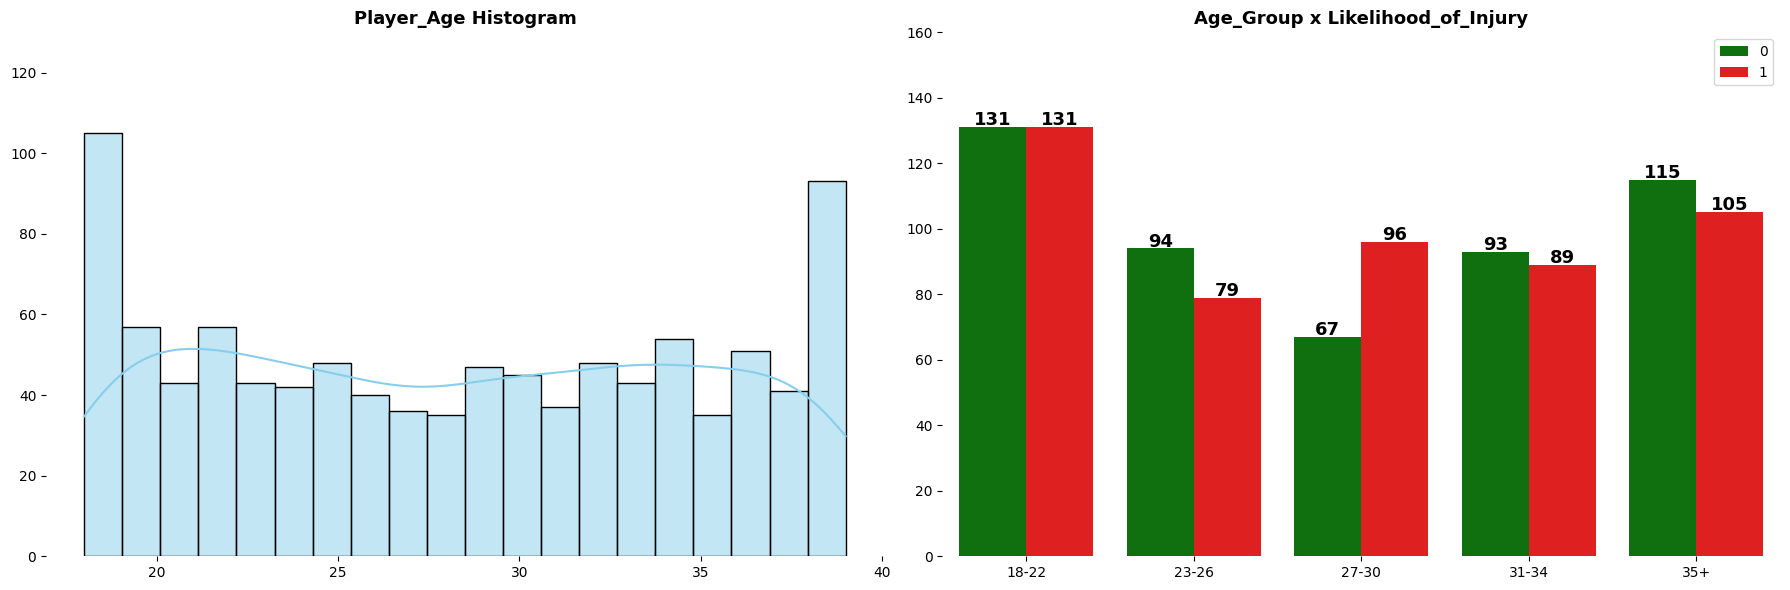

In [10]:
plot_dual_chart(df, 'Player_Age', 'Age_Group', cat_order=["18-22", "23-26", "27-30", "31-34", "35+"], y_limit1=130, y_limit2=160)

### 6.2 BMI_Classification <a id="6.2"></a> 

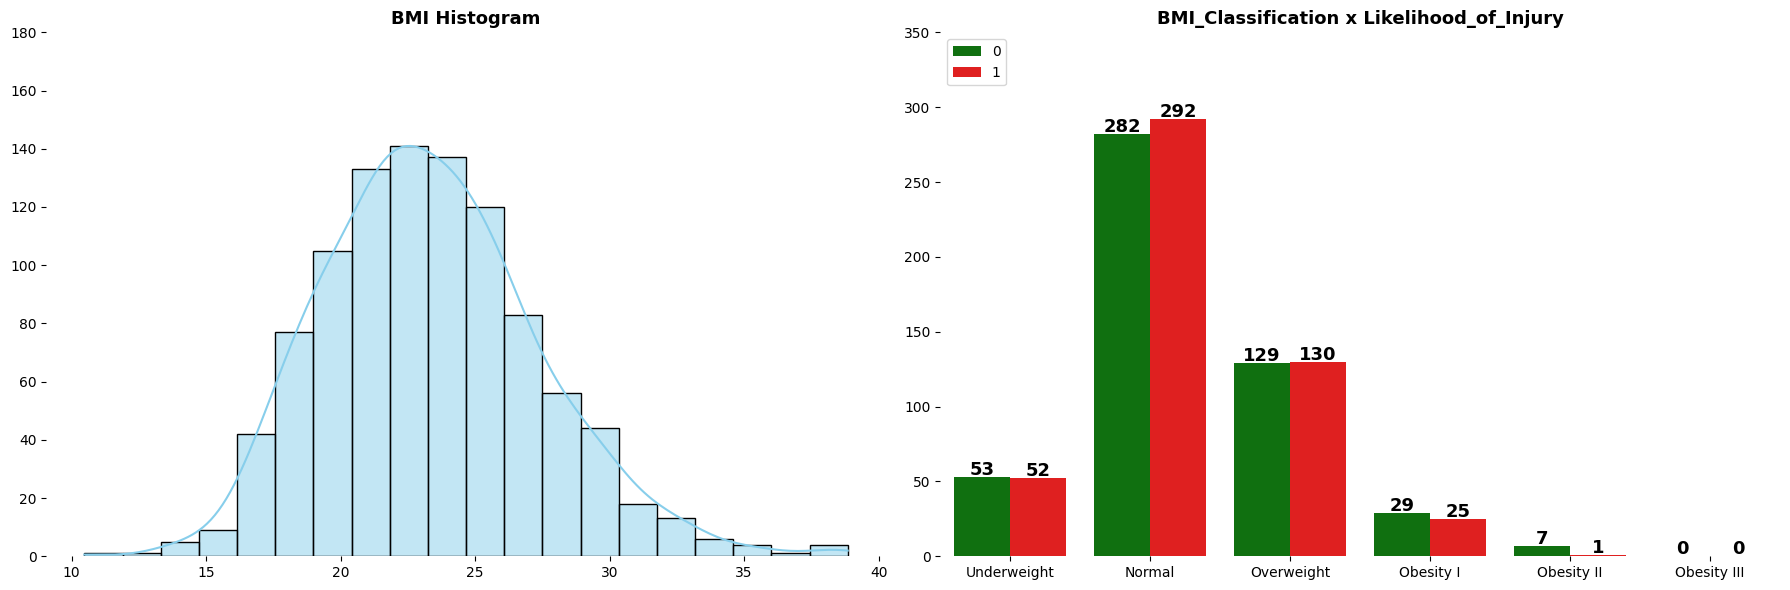

In [11]:
plot_dual_chart(df, 'BMI', 'BMI_Classification', y_limit1=180, y_limit2=350)

### 6.3 Player_Weight <a id="6.3"></a> 

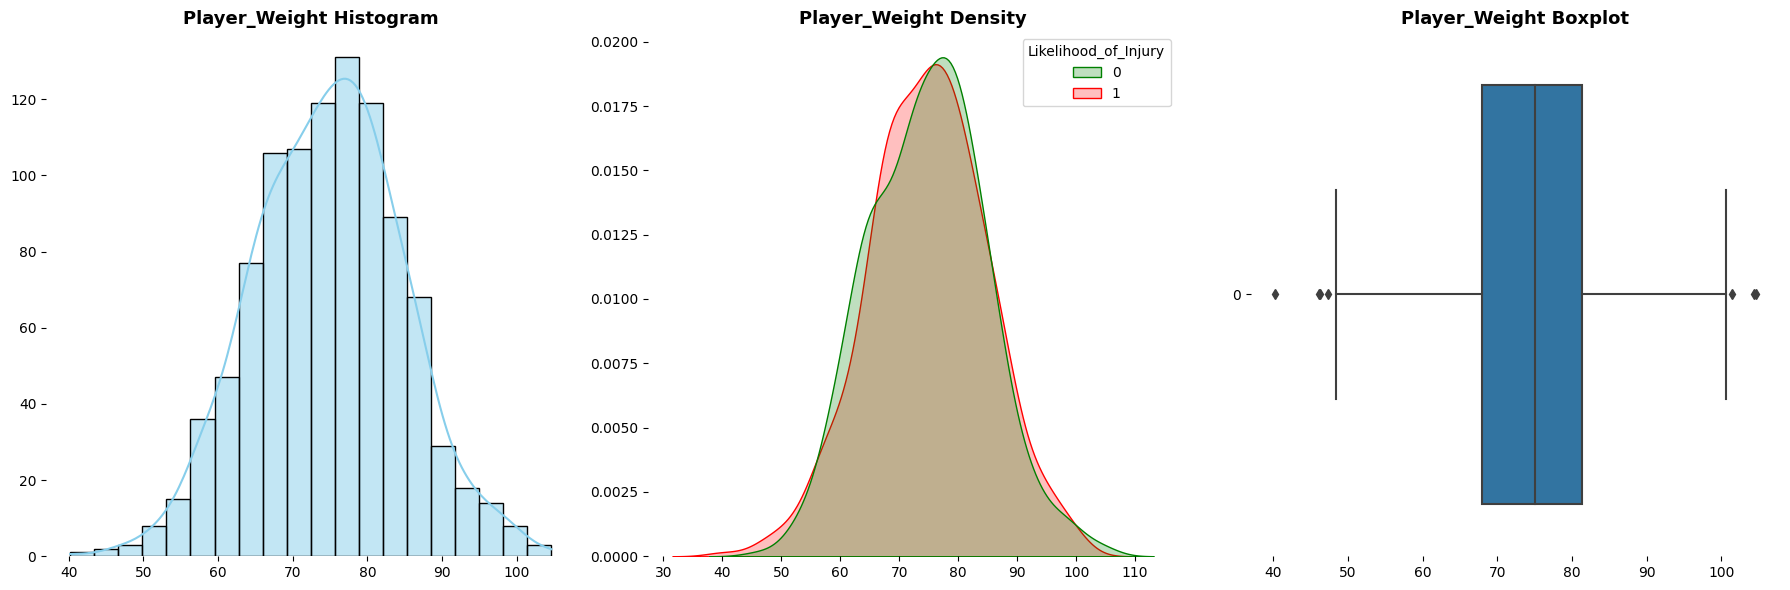

In [12]:
plot_histogram_kde_and_boxplot(df, 'Player_Weight', 'Likelihood_of_Injury')

### 6.4 Player_Height <a id="6.4"></a> 

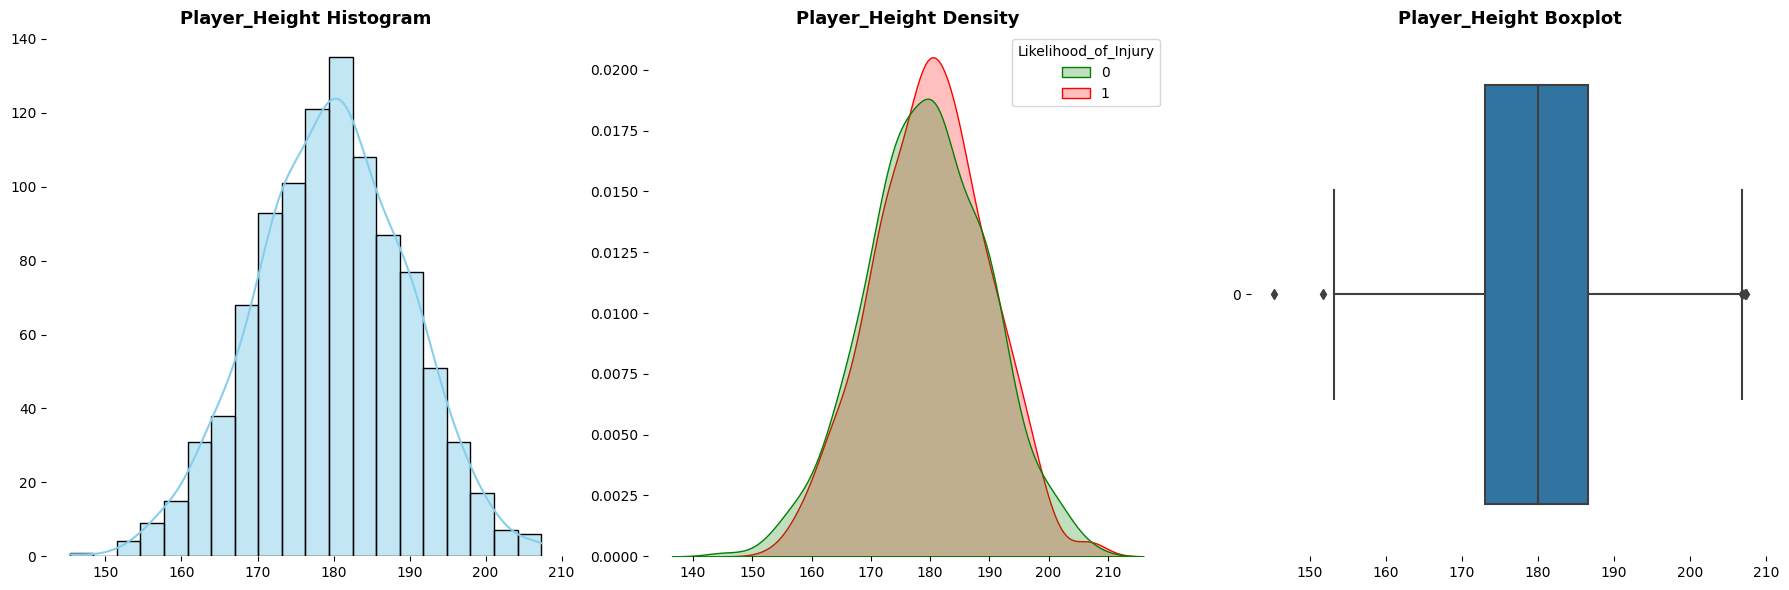

In [13]:
plot_histogram_kde_and_boxplot(df, 'Player_Height', 'Likelihood_of_Injury')

### 6.5 Training_Intensity <a id="6.5"></a> 

- We can observe that the patterns of injury probability invert in the density plot. In training sessions with lower intensity, the number of players without risk of injury exceeds the number of players at risk, while in training sessions with higher intensity, the number of players at risk of injury surpasses those without risk.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


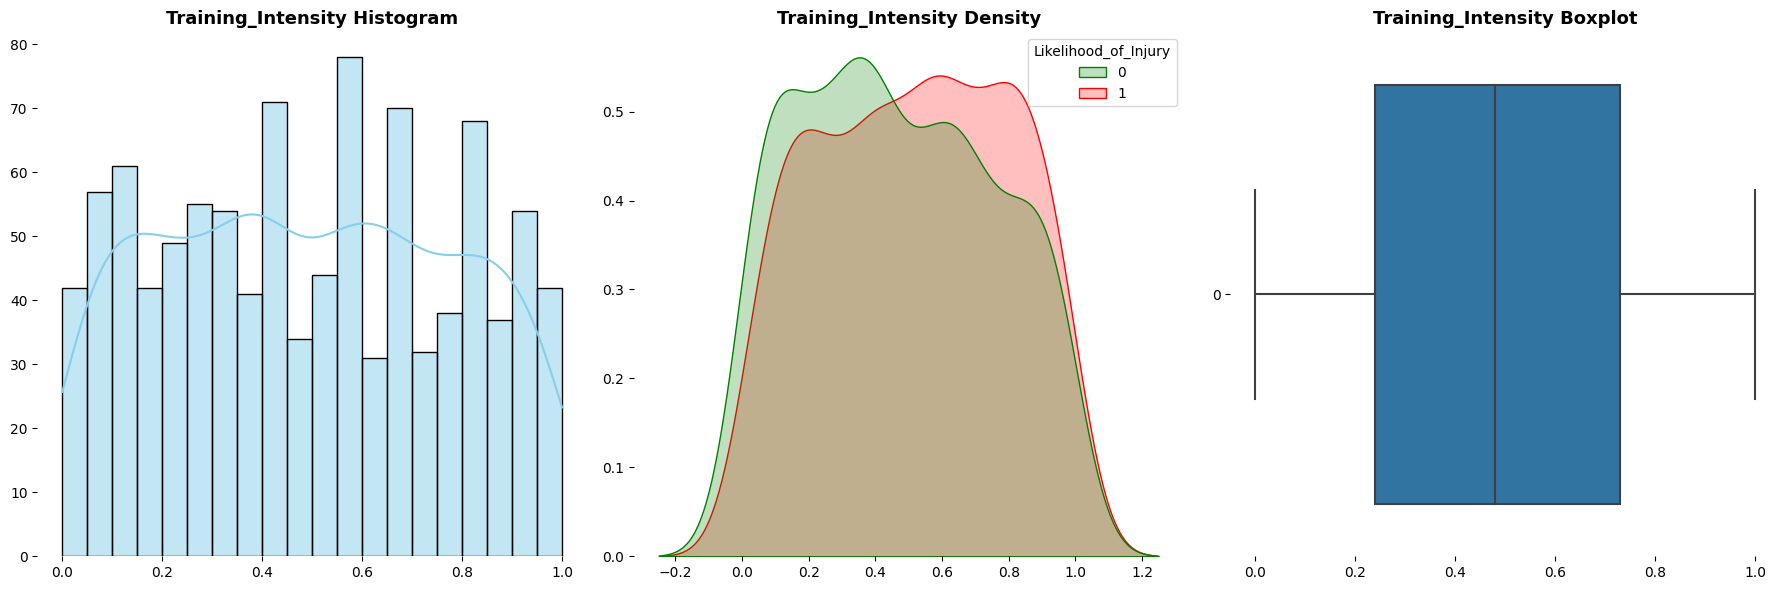

In [14]:
plot_histogram_kde_and_boxplot(df, 'Training_Intensity', 'Likelihood_of_Injury')

### 6.6 Recovery_Time <a id="6.6"></a>   

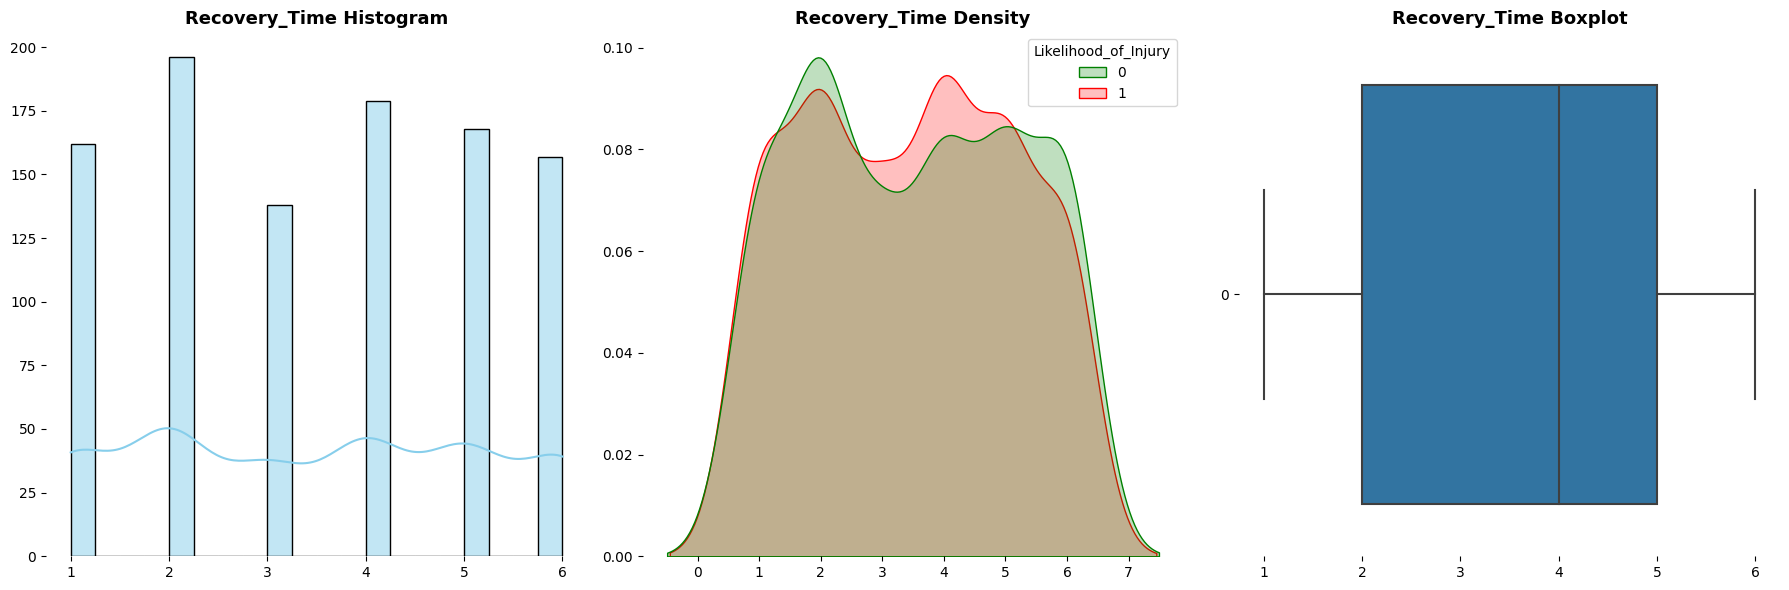

In [15]:
plot_histogram_kde_and_boxplot(df, 'Recovery_Time', 'Likelihood_of_Injury')

### 6.7 Previous_Injuries <a id="6.7"></a> 

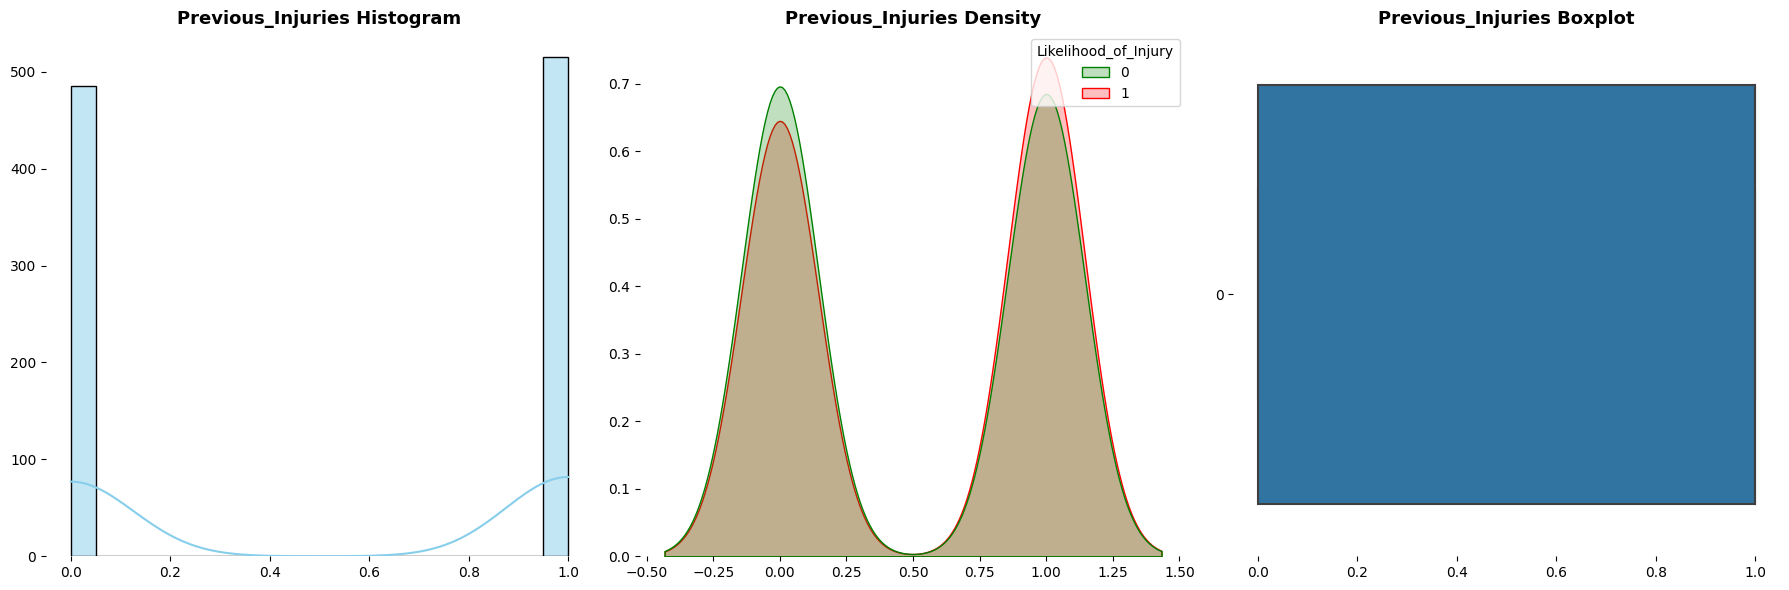

In [16]:
plot_histogram_kde_and_boxplot(df, 'Previous_Injuries', 'Likelihood_of_Injury')

### 6.8 Likelihood_of_Injury <a id="6.8"></a> 

- Our target column, Likelihood_of_Injury, displays a perfectly balanced data distribution. This means that there's no need to adjust the amount of data during the training process to ensure an adequate distribution between classes 1 and 0.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


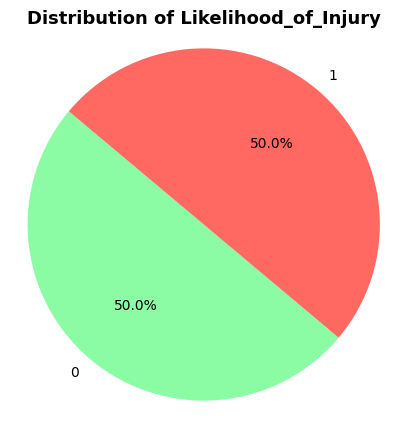

In [17]:
# Count 'Likelihood_of_Injury' | Contagem 'Likelihood_of_Injury'
li_count = df['Likelihood_of_Injury'].value_counts()

# Plot pie chart | Plotar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(li_count, labels=li_count.index, autopct='%1.1f%%', startangle=140, colors=['#8CFCA4', '#FF6961'])
plt.title('Distribution of Likelihood_of_Injury', weight='bold', size=13)
plt.axis('equal') 
plt.show()

## 7. Data Preprocessing <span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="7"></a> 

- Through the OneHotEncoder, we will transform the categorical variables into binary numeric representations.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 
- Através do OneHotEncoder, vamos transformar as variáveis categóricas em uma representações numéricas binárias.


In [18]:
# Categorical columns
one_hot_cols = [
    "BMI_Classification",
    "Age_Group",
]

# Selecting only categorical columns from the DataFrame | Selecionando apenas as colunas categóricas do DataFrame
df_categorical = df[one_hot_cols]

# Applying OneHotEncoder | Aplicando o OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df_categorical)

# Obtaining names of the features generated by OneHotEncoder | Obtendo os nomes das features geradas pelo OneHotEncoder
one_hot_feature_names = encoder.get_feature_names_out(one_hot_cols)

# Creating a DataFrame with transformed features | Criando um DataFrame com as features transformadas
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=one_hot_feature_names)

# Joining DataFrames | Juntar os DataFrames
df_final = pd.concat([df, df_encoded], axis=1)

# Dropping categorical columns | Excluindo colunas categóricas
df_final.drop(columns=['BMI_Classification', 'Age_Group'], inplace=True)

# Visualizing the first few rows of the final DataFrame | Visualizar as primeiras linhas do DataFrame final
df_final.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,BMI_Classification_Normal,BMI_Classification_Obesity I,BMI_Classification_Obesity II,BMI_Classification_Overweight,BMI_Classification_Underweight,Age_Group_18-22,Age_Group_23-26,Age_Group_27-30,Age_Group_31-34,Age_Group_35+
0,24,66.25,175.73,1,0.46,5,0,21.453298,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,37,71.00,174.58,0,0.23,6,1,23.295357,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32,80.09,186.33,0,0.61,2,1,23.068148,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,28,87.47,175.50,1,0.25,4,1,28.399120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,25,84.66,190.18,0,0.58,1,1,23.407152,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 8. Correlation Between Columns <span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="8"></a>

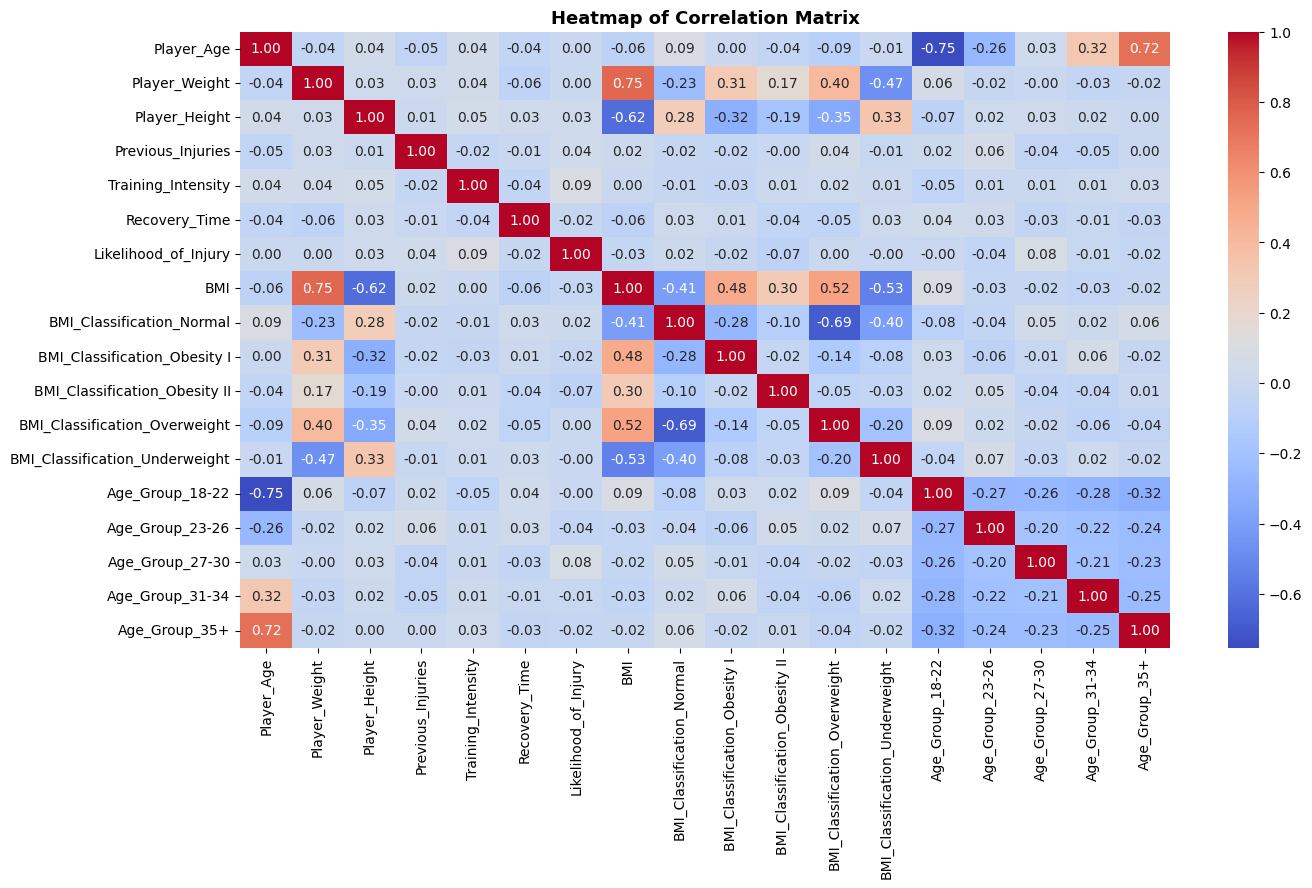

In [19]:
# Calculating correlation matrix | Calculando a matriz de correlação
correlation_matrix = df_final.corr()

# Plotting heatmap | Plotando o heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix', weight='bold', size=13)
plt.show()


### 8.1 Correlation with 'Likelihood_of_Injury <span style="color:#275317"> | </span> <span style="color:#009644"> '</span> <a id="8.1"></a> 

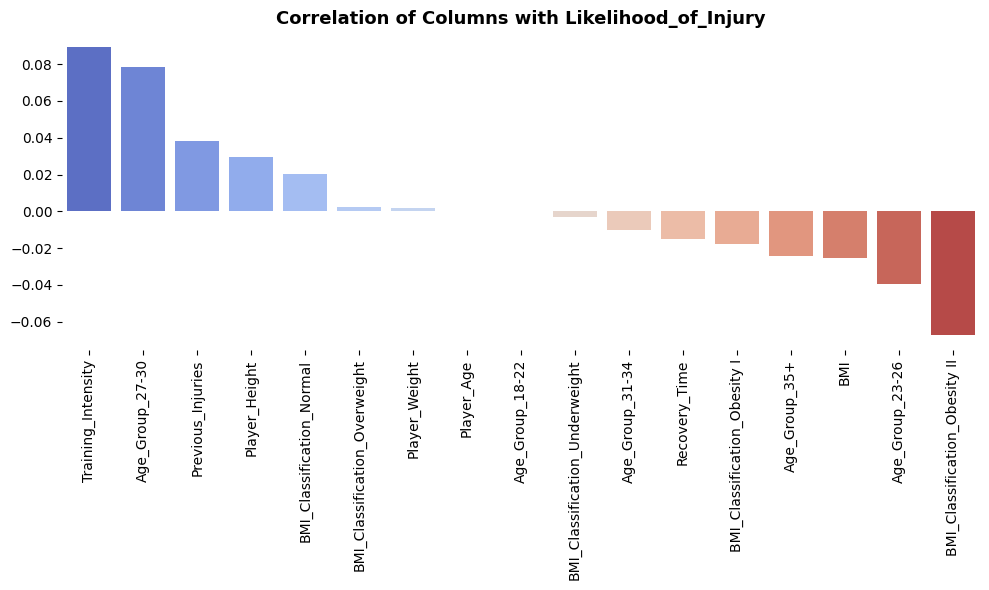

In [20]:
# Calculating correlation matrix | Calcular a matriz de correlação
correlation_matrix = df_final.corr()

# Selecting only 'Likelihood_of_Injury' column from the correlation matrix | Selecionar apenas a coluna 'Likelihood_of_Injury' da matriz de correlação
correlation_with_likelihood = correlation_matrix['Likelihood_of_Injury']

# Removing the correlation with the 'Likelihood_of_Injury' column | Remover a correlação com a coluna 'Likelihood_of_Injury'
correlation_with_likelihood = correlation_with_likelihood.drop('Likelihood_of_Injury')

# Sorting correlations in descending order | Ordenar as correlações em ordem decrescente
correlation_with_likelihood = correlation_with_likelihood.sort_values(ascending=False)

# Plotting correlation bar plot | Plotar o gráfico de barras de correlação
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_likelihood.index, y=correlation_with_likelihood.values, palette='coolwarm')
plt.xticks(rotation=90, ha='center')  
plt.xlabel('')
plt.ylabel('')
plt.box(False) 
plt.title('Correlation of Columns with Likelihood_of_Injury', weight='bold', size=13)
plt.tight_layout()
plt.show()


- Naturally, there is a correlation between the "BMI" and "Player_Age" columns and their respective groupings. Therefore, I adopted the following approach:

    1. I excluded the "BMI" column, keeping only the columns derived from its groupings ("BMI_Classification_").

    2. During my tests, I observed that the model achieved better performance with the "Player_Age" column compared to the age grouping columns ("Age_Group").

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


In [ ]:
# Drop columns starting with "Age_Group" | 
df_final = df_final.loc[:, ~df_final.columns.str.startswith('Age_Group')]

# Drop BMI column | 
df_final = df_final.drop(columns=['BMI'])

df_final.head(1)

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI_Classification_Normal,BMI_Classification_Obesity I,BMI_Classification_Obesity II,BMI_Classification_Overweight,BMI_Classification_Underweight
0,24,66.25,175.73,1,0.46,5,0,1.0,0.0,0.0,0.0,0.0


## 9. Training Models <span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="9"></a> 

In [22]:
# Features
X = df_final.drop('Likelihood_of_Injury', axis=1)

# Target variable | Variável alvo
y = df_final['Likelihood_of_Injury']

# Split data into training and testing sets | Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [23]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

# Dictionary models | Dicionário de modelos
models = {
    "LGBMClassifier": LGBMClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "NuSVC": NuSVC(probability=True),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    }

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    recall = recall_score(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    
    print(f"Model: {model_name}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print("-" * 50)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 441, number of negative: 459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 651
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490000 -> initscore=-0.040005
[LightGBM] [Info] Start training from score -0.040005
Model: LGBMClassifier
Recall: 0.5423728813559322
Accuracy: 0.61
Precision: 0.7272727272727273
--------------------------------------------------
Model: AdaBoostClassifier
Recall: 0.576271186440678
Accuracy: 0.6
Precision: 0.6938775510204082
--------------------------------------------------
Model: ExtraTreesClassifier
Recall: 0.4915254237288136
Accuracy: 0.56
Precisi

## 10. Model Selection <span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="10"></a> 

- In a real-life scenario where the outcome of this model could assist a coaching staff in deciding whether or not to field a player based on the probability of them sustaining an injury during the game, I would opt for the model with the lowest incidence of False Negatives. This way, the player's health and physical condition would be preserved by reducing the possibility of them participating in a game wrongly identified by the model as not posing a risk of injury.


- Considering this situation, I will choose to use the recall score to select the best model, as this metric is penalized whenever a false negative is predicted.


- Finally, I will plot the confusion matrices and the ROC curve to reinforce the selection of the model that best minimizes the risk of false negatives.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 



### 10.1 Confusion Matrix <span style="color:#275317"> | </span> <span style="color:#009644">  </span> <a id="101"></a> 

- We can observe that the model with the fewest False Negatives was NuSVC, with only 11 cases. It is clearly the best option considering this specific situation.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


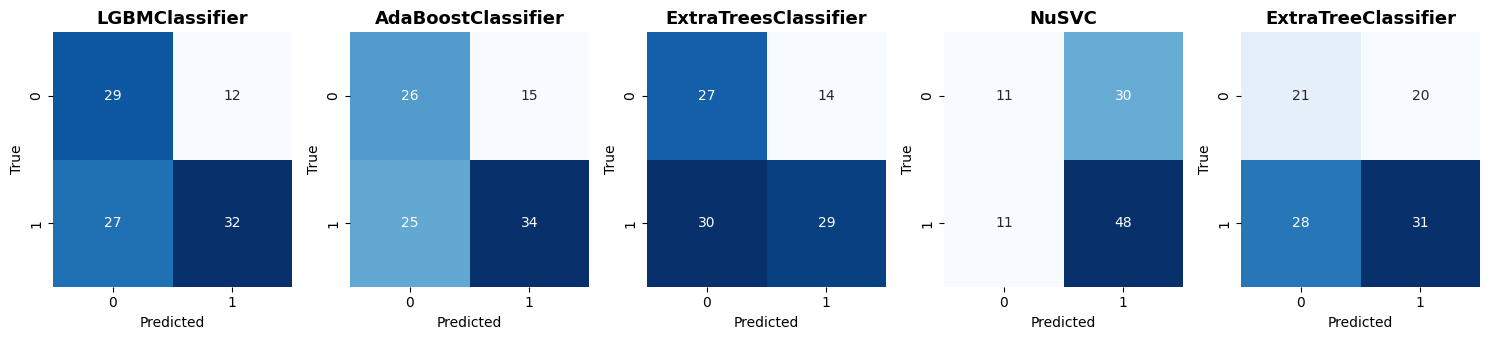

In [24]:
# Create figure and axes
fig, axes = plt.subplots(1, len(models), figsize=(15, 3.5))

# Plot confusion matrix for each model
for ax, (model_name, model) in zip(axes, models.items()):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_title(f"{model_name}", weight='bold', size=13)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Adjust layout and show figure
plt.tight_layout()
plt.show()

### 10.2 Inverted ROC Curve <span style="color:#275317"> | </span> <span style="color:#009644"> </span> <a id="102"></a> 

- The inverted ROC curve is useful when the analysis focuses on the negative class rather than the positive class. It provides insight into the model's ability to avoid misclassifying negative instances.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
 


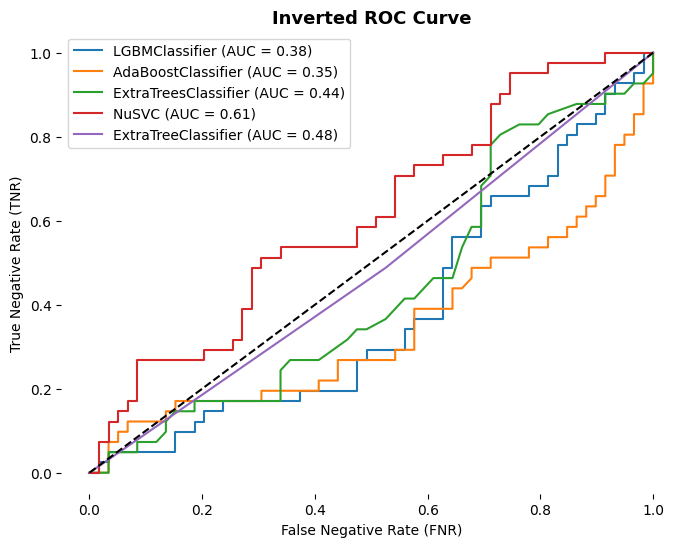

In [25]:
# Plot Inverted ROC Curve
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 0]  # Probabilities of belonging to the negative class
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    tnr = 1 - fpr  # True Negative Rate (TNR)
    fnr = 1 - tpr  # False Negative Rate (FNR)
    
    auc = roc_auc_score(y_test, y_proba)
    plt.plot(fnr, tnr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

plt.xlabel('False Negative Rate (FNR)')
plt.ylabel('True Negative Rate (TNR)')
plt.title('Inverted ROC Curve', weight='bold', size=13)
plt.legend()

plt.box(False)  # Remove plot borders
plt.show()

- Based on the Recall value obtained, as well as the visualization of the Confusion Matrix and the ROC curve, the chosen model is NuSVC.

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
    
- 

## 11. The End <span style="color:#275317"> | </span> <span style="color:#009644"> Fim </span> <a id="the_end"></a> 
    
- If you liked or found this Notebook helpful in any way, please leave your upvote! Feel free to comment if you have any questions or suggestions. Thank you!

<hr style="border: 1px solid #275317;">
   
<font color='#009644'> 
   

